# Investigation to figure out if ratings biases are removed

The project aims to investigate Fandango's claim of "removing" the bug after Walt Hickey provided evidence of over-rating movies by the organisation. In october 2015 Walt Hickey, a journalist found evidence that Farnando was rounding ratings to next half star (or in some case cases next star). For e.g: 4.1 star becomes 4.5 and not 4 as someone would expect. This substantially inflates movie reviews and favours them. Farnando's officials replied it was because of a bug in their system and they would take action to fix it as soon as possible.

The project aims to discover if the bug has been fixed by comparing actual ratings with the Farnando's.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fandango_score = pd.read_csv("fandango_score_comparison.csv")
fandango_score.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
movie_ratings_16_17 = pd.read_csv("movie_ratings_16_17.csv")
movie_ratings_16_17.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


## Isolating the required data

In [4]:
fandango_score = fandango_score.loc[:,['FILM','Fandango_Stars','Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
movie_ratings_16_17 = movie_ratings_16_17.loc[:,['movie', 'year', 'fandango']]

In [5]:
fandango_score.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [6]:
movie_ratings_16_17.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [7]:
fandango_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
FILM                    146 non-null object
Fandango_Stars          146 non-null float64
Fandango_Ratingvalue    146 non-null float64
Fandango_votes          146 non-null int64
Fandango_Difference     146 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.8+ KB


In [8]:
movie_ratings_16_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
movie       214 non-null object
year        214 non-null int64
fandango    214 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ KB


## Population for Analysis

All the movies listed on Fandango's website is the population for analysis.


The fandango_score is not a good dataset because it only contains movies that had received 30 or more reviews at the time of data collection. This potentially eliminates a lot of other movies which received lesser reviews.

The movie_rating_16_17 is again a poor dataset which only consists of most popular movies (based on user votes). Both the samples are not proper representatives of the population. Hence, a different approach has to be taken.

## The goal of the project can be adjusted to accomodate the limitation.

Rather than assessing all the movies to find evidence of ratings biased we can compare the two data set (representative of the most popular movies) to assess the situation and determine if the biases are removed. This should be a good proxy to the original goal.


## Checking if sample sizes are large enough for experiment

In [9]:
count_popular = fandango_score[fandango_score["Fandango_votes"] > 30]["Fandango_votes"].count()
count_popular

146

This shows that all the movies in fandango dataset is popular. However, the second data set doesn't account for votes. In this case, we will take a random sample of 10 movies to see if most of them exist in the fandago_score database. If they do then it confirms that the sample is good enough.

In [10]:
sample_10 = movie_ratings_16_17.sample(10, random_state = 10)
sample_10

,movie,year,fandango
161,The Autopsy of Jane Doe,2016,4.5
120,Neighbors 2: Sorority Rising,2016,3.5
105,Masterminds,2016,3.5
148,Split,2016,4.0
69,Hidden Figures,2016,5.0
127,Ouija: Origin of Evil,2016,3.5
19,Beauty and the Beast,2017,4.5
175,The Forest,2016,3.0
47,Elvis & Nixon,2016,3.5
149,Star Trek Beyond,2016,4.5


In [11]:
fandango_score["Year"] = fandango_score["FILM"].apply(lambda x: x.split("(")[1])
fandango_score["FILM"] = fandango_score["FILM"].apply(lambda x: x.split("(")[0])
fandango_score["Year"] = fandango_score["Year"].str.replace(")","")                                                      

In [12]:
fandango_score.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron,5.0,4.5,14846,0.5,2015
1,Cinderella,5.0,4.5,12640,0.5,2015
2,Ant-Man,5.0,4.5,12055,0.5,2015


In [13]:
fandango_score["FILM"] = fandango_score["FILM"].str.strip(" ")
sample_10["movie"] = sample_10["movie"].str.strip(" ")
sample_10

,movie,year,fandango
161,The Autopsy of Jane Doe,2016,4.5
120,Neighbors 2: Sorority Rising,2016,3.5
105,Masterminds,2016,3.5
148,Split,2016,4.0
69,Hidden Figures,2016,5.0
127,Ouija: Origin of Evil,2016,3.5
19,Beauty and the Beast,2017,4.5
175,The Forest,2016,3.0
47,Elvis & Nixon,2016,3.5
149,Star Trek Beyond,2016,4.5


 The movies in the data set belongs to different years. They may cause discrepancies while comparing therefore it is necessary to seperate them out

In [14]:
fandango_score["Year"].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [15]:
fandango_15 = fandango_score[fandango_score["Year"] == '2015'].copy()
fandango_16 = movie_ratings_16_17[movie_ratings_16_17["year"] == 2016].copy()

In [16]:
fandango_15.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron,5.0,4.5,14846,0.5,2015
1,Cinderella,5.0,4.5,12640,0.5,2015


In [17]:
fandango_16.head(2)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5


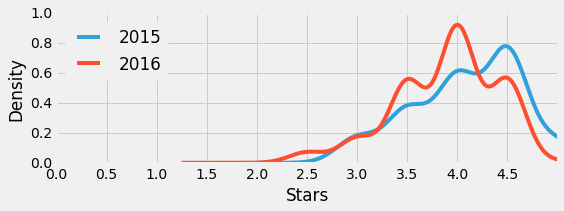

In [18]:
import numpy as np
plt.style.use('fivethirtyeight')

fandango_15["Fandango_Stars"].plot.kde(label = '2015', legend = True, figsize = (8,2.5))
fandango_16["fandango"].plot.kde(label = '2016', legend = True)
plt.xlim(0,5)
plt.xticks(np.arange(0,5,0.5))
plt.xlabel('Stars')

Some insights by looking at the graph:

1. They both are extremely left skewed.
2. 2015 ratings are slightly more towards the left (less exaggerated) than 2016.
3. It looks like the ratings are still biased given the fact that fandango sells the tickets itself; however this can't be concluded at this stage since the number of movies in each dataset are different. Further evidence is needed to make a conclusive statement.

## Examining absolute frequencies of each datasets

In [19]:
print("2015 Dataset" + "\n" + "$"*20)
fandango_15["Fandango_Stars"].value_counts(normalize = True).sort_index() * 100

2015 Dataset
$$$$$$$$$$$$$$$$$$$$


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [20]:
print("2016 Dataset" + "\n" + "$"*20)
fandango_16["fandango"].value_counts(normalize = True).sort_index() * 100

2016 Dataset
$$$$$$$$$$$$$$$$$$$$


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

The percentage of movie with high ratings (5 or 4.5) have dropped significantly in 2016 compared to 2015. Movies on the lower end of ratings i.e 2.5 has increased. However, some of the ratings have seen a significant jump like movies with ratings 4.0 increased by 12%.

In [21]:
mean_16 = fandango_16["fandango"].mean()
median_16 = fandango_16["fandango"].median()
mode_16 = fandango_16["fandango"].mode()[0]
mean_15 = fandango_15["Fandango_Stars"].mean()
median_15 = fandango_15["Fandango_Stars"].median()
mode_15 = fandango_15["Fandango_Stars"].mode()[0]

statistics = pd.DataFrame()
statistics["2015"] = [mean_15, median_15, mode_15]
statistics["2016"] = [mean_16, median_16, mode_16]
statistics.index = ["Mean", "Median", "Mode"]

In [22]:
statistics

,2015,2016
Mean,4.085271,3.887435
Median,4.000000,4.000000
Mode,4.500000,4.000000


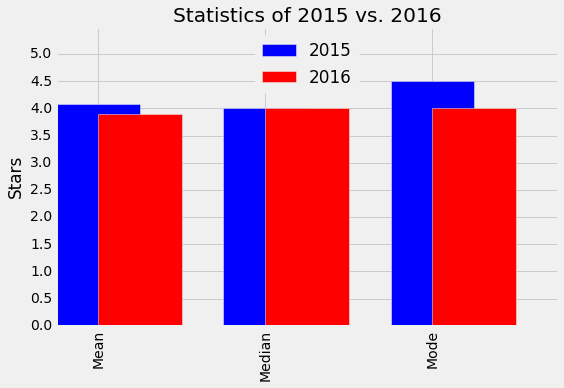

In [23]:
statistics['2015'].plot.bar(color = 'blue', align = 'center', label = '2015', figsize=(8,5))
statistics['2016'].plot.bar(color = 'red', align = 'edge', label = '2016')
plt.title("Statistics of 2015 vs. 2016")
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(loc = 'upper center')
plt.show()

# Conclusion

The aim of this project was to conclude if there's a difference between ratings found in 2015 compared to 2016. All the methods used to investigate follow the same results. Although there's a drop in ratings in 2016; however, they are still relatively high.
The frequncy analysis, graph analysis and the summary stats all point that data is left skewed. However, the lack of proper dataset and assumptions used to propel the investigations does not consititue sufficient evidence to make any conclusive statement. At best, Fandango should not be held responsible for bad practices but at the same time consumers must become more aware about making a purchase after reading a review from site that also sells tickets.